# Graphics of Ne Line Ratios Histograms and Ne Line Ratios vs fracAGN

In [1]:
from astropy.table import Table, Column, table, vstack, join
from pathlib import Path

import numpy as np
import pandas as pd
import astropy.units as u

from matplotlib import pyplot as plt

In [2]:
path_CIGALE_phot = '../Datos/Work/CIGALE_InputPhot/'
path_CIGALE_out = '../Datos/Work/CIGALE_Output/'
path_graphs = '../Datos/Final/Graphics/'
path_FINAL = '../Datos/Final/'

In [3]:
Ne_Sy = Table.read(path_FINAL+'Ne_ratios_-_CIGALE_results.tbl', format='ascii')
Ne_Sy_bib = Table.read(path_FINAL+'Ne_ratios_-_CIGALE_results_bib.tbl', format='ascii')

In [4]:
Ne_Sy1 = Ne_Sy[Ne_Sy['otype']=='Sy1']
Ne_Sy2 = Ne_Sy[Ne_Sy['otype']=='Sy2']
Ne_SyG = Ne_Sy[Ne_Sy['otype']=='SyG']

Ne_Sy1_bib = Ne_Sy_bib[Ne_Sy_bib['otype']=='Sy1']
Ne_Sy2_bib = Ne_Sy_bib[Ne_Sy_bib['otype']=='Sy2']
Ne_SyG_bib = Ne_Sy_bib[Ne_Sy_bib['otype']=='SyG']

In [35]:
Ne_Sy1

Main_id,RA,DEC,otype,redshift,[NeV]/[NeII],[NeV]/[NeII]_err,[NeV]/[NeIII],[NeV]/[NeIII]_err,[NeIII]/[NeII],[NeIII]/[NeII]_err,[NeII]/[NeV],[NeII]/[NeV]_err,bayes.agn.fracAGN,bayes.agn.fracAGN_err,bayes.agn.i,bayes.agn.i_err,bayes.sfh.sfr,bayes.sfh.sfr_err,bayes.stellar.m_star,bayes.stellar.m_star_err,best.reduced_chi_square,log.reduced_chi_square,log_[NeV]/[NeII],log_[NeV]/[NeIII],log_[NeIII]/[NeII],log_[NeII]/[NeV],log_bayes.agn.fracAGN,log_bayes.sfh.sfr,log_bayes.stellar.m_star
str24,float64,float64,str3,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
2E 2389,166.0577547903,76.98283181919,Sy1,0.3115,1.1556064073226544,0.17151303566833198,nan,nan,nan,nan,0.8653465346534653,0.12843318462325534,0.8188987719707819,0.024258975221072464,26.011843998959925,11.071888539354369,32.99957287515418,13.005716016371974,82007440862.93582,69392222513.68936,1.442908260688541,0.15923871976759285,0.06280994114823953,nan,nan,-0.06280994114823954,-0.08676978015852753,1.5185083186910966,10.913853259445968
2E 3648,245.09091058141,17.60665343366,Sy1,0.55517,1.7878787878787878,0.279439361062646,0.7391975308641976,nan,2.4545454545454546,0.2468333394786096,0.559322033898305,0.08742012760621128,0.7373844941753334,0.09571439256469585,32.20528489575952,9.404682549643882,110.83038756721615,54.366157677823296,96631370793.32745,102566202983.27977,2.3766658631781086,0.37596812830862414,0.25233807176425666,-0.1312394924560301,0.3899710790007623,-0.2523380717642567,-0.13230599903922194,2.0446588519392694,10.985118140397837
2MASS J13000535+1632148,195.02228295163,16.53743305218,Sy1,0.07993,nan,nan,nan,nan,0.8682634730538922,nan,nan,nan,0.8965686836336649,0.012756600426181958,30.00012232757058,0.06995061014321474,0.32288521124759556,0.3671437943670147,100638928966.24312,23208507814.63596,2.784891277648112,0.44480824495349636,nan,nan,-0.0613484689126084,nan,-0.04741643473480097,-0.4909518460347012,11.002766006216003
2MASSI J0918486+211717,139.7025485953,21.288075035289996,Sy1,0.14903,4.562118126272912,nan,1.7230769230769232,nan,2.6476578411405294,nan,0.21919642857142857,nan,0.8988839720632542,0.013870021401598235,44.20391814907898,14.529180682596715,0.5329401797567834,1.1935901737550823,152823017793.68384,53131442843.11487,0.9454285200616502,-0.024371300786463282,0.6591665262111943,0.23630466602732605,0.4228618601838683,-0.6591665262111943,-0.04629636337769971,-0.27332153592564123,11.18418877143811
2MASX J14510879+2709272,222.78651997439997,27.15748964087,Sy1,0.06449,5.266272189349112,nan,nan,nan,nan,nan,0.1898876404494382,nan,0.899955362964844,0.0014940994387965115,7.5626569304964075,7.822212659918313,0.15462531197470453,0.31682075857974806,26200318190.297752,11239826484.458948,1.2185272266241656,0.08583523745224399,0.7215033020312392,nan,nan,-0.7215033020312392,-0.04577903067045741,-0.8107194111218787,10.418306565649951
3C 234.0,150.45634473807,28.7858176354,Sy1,0.18494,4.125,1.3524428130239001,0.5468077474892397,0.06828504167318082,10.25,2.7077723778043086,0.24242424242424243,0.07948240590774068,0.7969805426542415,0.05517300476229385,30.056888079145082,1.5074106647679544,35.86713622751423,11.281488739406168,88100575855.77481,32579238962.71051,1.985865933800802,0.2979499258432289,0.6154239528859439,-0.26216534072457226,1.0107238653917732,-0.6154239528859439,-0.09855228126517455,1.554696702289615,10.94497874711997
7C 1821+6419,275.4883876131,64.34339480891,Sy1,0.297,1.8472727272727272,0.15141003725431723,0.48846153846153845,0.02311472217491531,3.7818181818181817,0.31056886962893887,0.5413385826771654,0.04437032700166525,0.6915592854364581,0.11269035291407396,33.40082195370531,10.102853041982137,489.74909023323397,166.51602998912847,245212945616.7012,240727355723.95312,2.0802254795831856,0.3181104115163454,0.26653101845365657,-0.3111696270148611,0.5777006454685176,-0.26653101845365657,-0.16017058311178423,2

## Histograms of the Ne ratios

### [NeV]/[NeII]

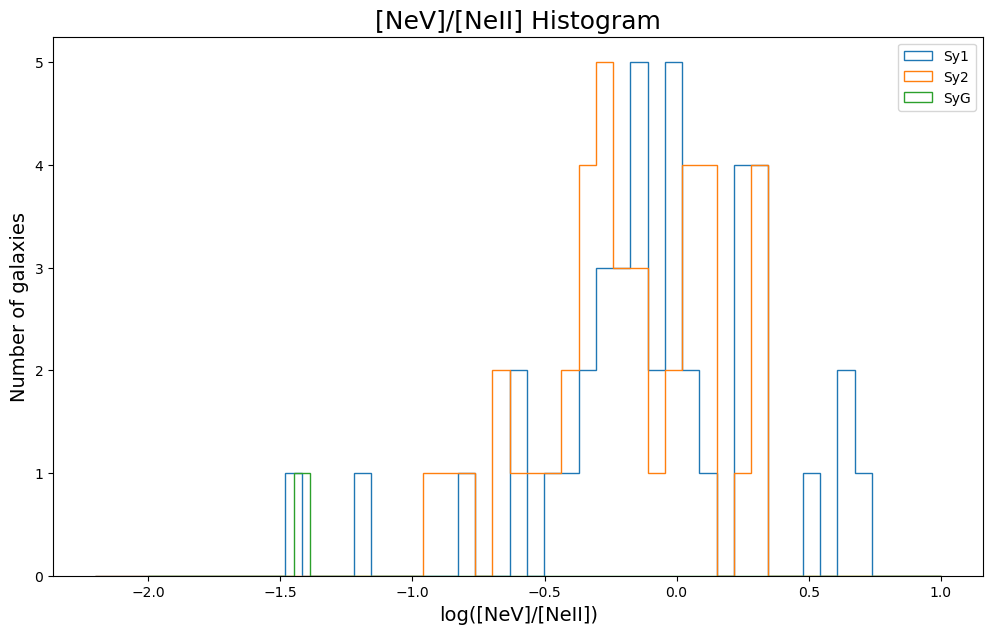

In [6]:
x_NeV_NeII_Sy1 = np.log10(Ne_Sy1['[NeV]/[NeII]'])
x_NeV_NeII_Sy2 = np.log10(Ne_Sy2['[NeV]/[NeII]'])
x_NeV_NeII_SyG = np.log10(Ne_SyG['[NeV]/[NeII]'])
bins_NeV_NeII_Sy1 = np.linspace(-2.2,1,50)
bins_NeV_NeII_Sy2 = np.linspace(-2.2,1,50)
bins_NeV_NeII_SyG = np.linspace(-2.,1,50)
plt.figure(figsize=(12,7))
plt.hist(x_NeV_NeII_Sy1, bins=bins_NeV_NeII_Sy1, histtype='step', label='Sy1')
plt.hist(x_NeV_NeII_Sy2, bins=bins_NeV_NeII_Sy2, histtype='step', label='Sy2')
plt.hist(x_NeV_NeII_SyG, bins=bins_NeV_NeII_SyG, histtype='step', label='SyG')
plt.xlabel('log([NeV]/[NeII])',fontsize=14)
plt.ylabel('Number of galaxies',fontsize=14)
plt.title('[NeV]/[NeII] Histogram', fontsize=18)
plt.legend()
plt.savefig(path_graphs+'hist_NeV_NeII_Sy.jpg')

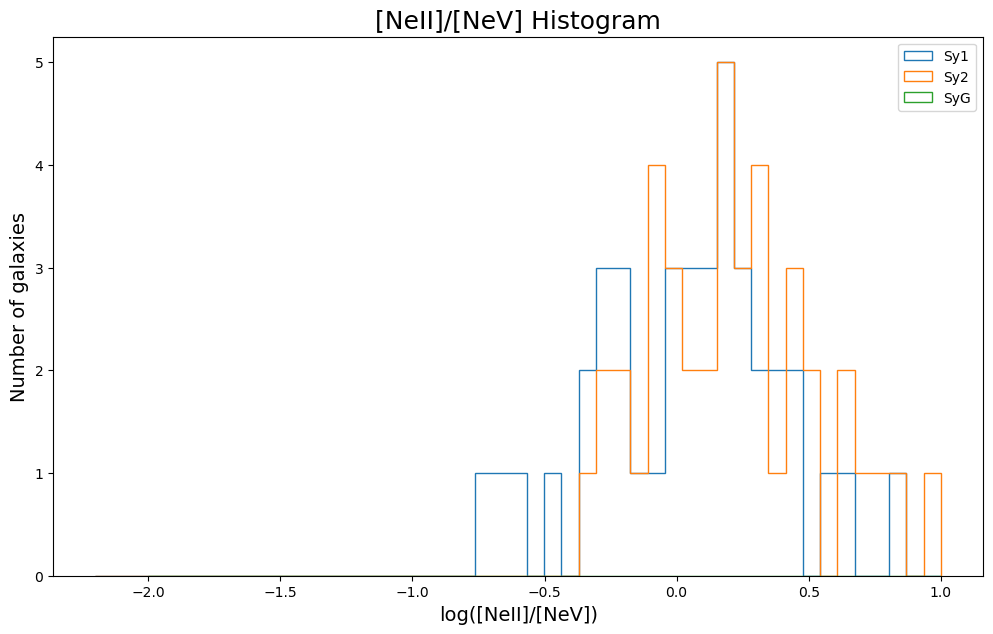

In [7]:
x_NeII_NeV_Sy1 = np.log10(Ne_Sy1['[NeII]/[NeV]'])
x_NeII_NeV_Sy2 = np.log10(Ne_Sy2['[NeII]/[NeV]'])
x_NeII_NeV_SyG = np.log10(Ne_SyG['[NeII]/[NeV]'])
bins_NeII_NeV_Sy1 = np.linspace(-2.2,1,50)
bins_NeII_NeV_Sy2 = np.linspace(-2.2,1,50)
bins_NeII_NeV_SyG = np.linspace(-2.,1,50)
plt.figure(figsize=(12,7))
plt.hist(x_NeII_NeV_Sy1, bins=bins_NeII_NeV_Sy1, histtype='step', label='Sy1')
plt.hist(x_NeII_NeV_Sy2, bins=bins_NeII_NeV_Sy2, histtype='step', label='Sy2')
plt.hist(x_NeII_NeV_SyG, bins=bins_NeII_NeV_SyG, histtype='step', label='SyG')
plt.xlabel('log([NeII]/[NeV])',fontsize=14)
plt.ylabel('Number of galaxies',fontsize=14)
plt.title('[NeII]/[NeV] Histogram', fontsize=18)
plt.legend()
#plt.savefig(path_graphs+'hist_NeII_NeV_Sy.jpg')

### [NeV]/[NeIII]

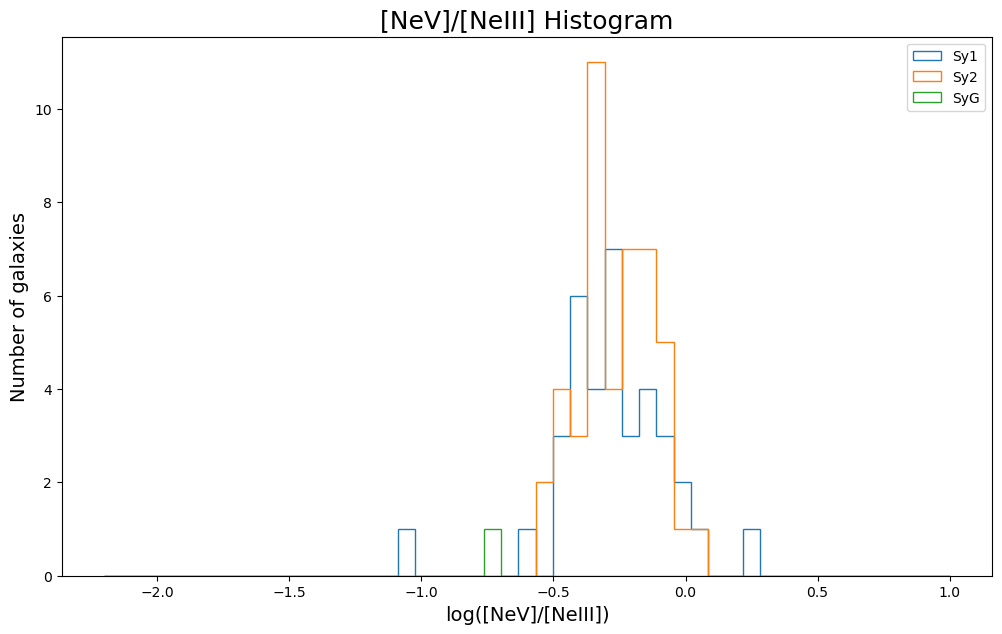

In [8]:
x_NeV_NeIII_Sy1 = np.log10(Ne_Sy1['[NeV]/[NeIII]'])
x_NeV_NeIII_Sy2 = np.log10(Ne_Sy2['[NeV]/[NeIII]'])
x_NeV_NeIII_SyG = np.log10(Ne_SyG['[NeV]/[NeIII]'])
bins_NeV_NeIII_Sy1 = np.linspace(-2.2,1,50)
bins_NeV_NeIII_Sy2 = np.linspace(-2.2,1,50)
bins_NeV_NeIII_SyG = np.linspace(-2.2,1,50)
plt.figure(figsize=(12,7))
plt.hist(x_NeV_NeIII_Sy1, bins=bins_NeV_NeIII_Sy1, histtype='step', label='Sy1')
plt.hist(x_NeV_NeIII_Sy2, bins=bins_NeV_NeIII_Sy2, histtype='step', label='Sy2')
plt.hist(x_NeV_NeIII_SyG, bins=bins_NeV_NeIII_SyG, histtype='step', label='SyG')
plt.xlabel('log([NeV]/[NeIII])',fontsize=14)
plt.ylabel('Number of galaxies',fontsize=14)
plt.title('[NeV]/[NeIII] Histogram', fontsize=18)
plt.legend()
plt.savefig(path_graphs+'hist_NeV_NeIII_Sy.jpg')

### [NeIII]/[NeII]

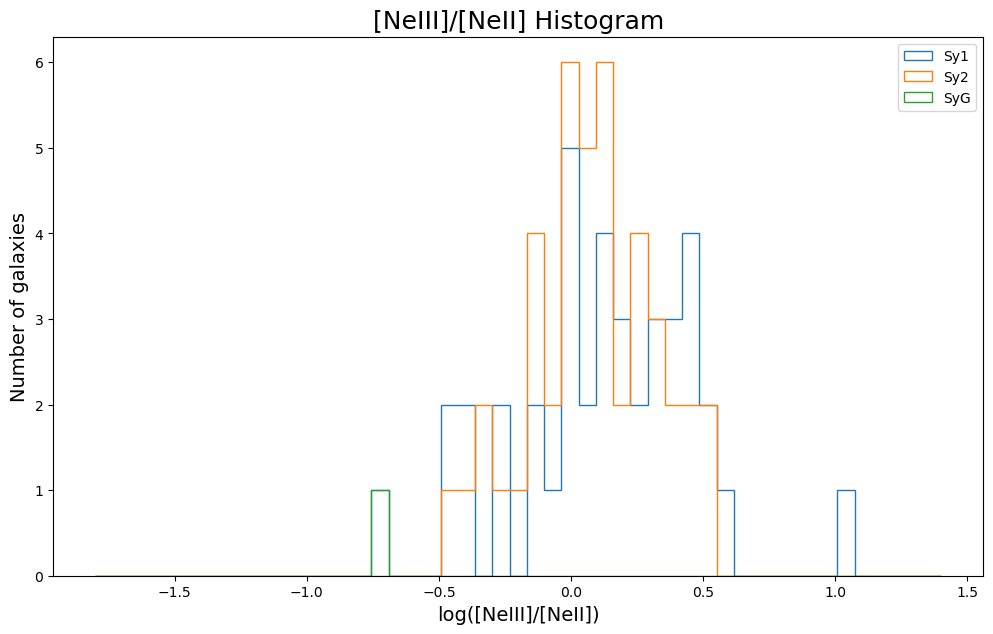

In [9]:
x_NeIII_NeII_Sy1 = np.log10(Ne_Sy1['[NeIII]/[NeII]'])
x_NeIII_NeII_Sy2 = np.log10(Ne_Sy2['[NeIII]/[NeII]'])
x_NeIII_NeII_SyG = np.log10(Ne_SyG['[NeIII]/[NeII]'])
bins_NeIII_NeII_Sy1 = np.linspace(-1.8,1.4,50)
bins_NeIII_NeII_Sy2 = np.linspace(-1.8,1.4,50)
bins_NeIII_NeII_SyG = np.linspace(-1.8,1.4,50)
plt.figure(figsize=(12,7))
plt.hist(x_NeIII_NeII_Sy1, bins=bins_NeIII_NeII_Sy1, histtype='step', label='Sy1')
plt.hist(x_NeIII_NeII_Sy2, bins=bins_NeIII_NeII_Sy2, histtype='step', label='Sy2')
plt.hist(x_NeIII_NeII_SyG, bins=bins_NeIII_NeII_SyG, histtype='step', label='SyG')
plt.xlabel('log([NeIII]/[NeII])',fontsize=14)
plt.ylabel('Number of galaxies',fontsize=14)
plt.title('[NeIII]/[NeII] Histogram', fontsize=18)
plt.legend()
plt.savefig(path_graphs+'hist_NeIII_NeII_Sy.jpg')

## AGN Fraction vs Ne ratios

### [NeV]/[NeII]

/home/jonhatan/anaconda3/lib/python3.9/site-packages/matplotlib/axes/_base.py:2480: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


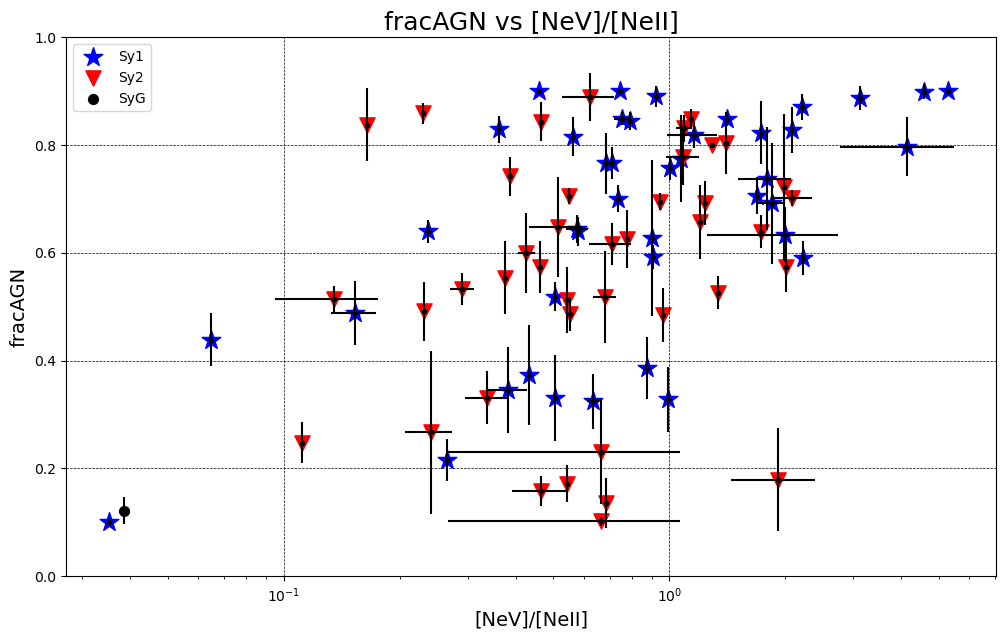

In [10]:
plt.figure(figsize=(12,7))
plt.scatter(Ne_Sy1['[NeV]/[NeII]'],Ne_Sy1['bayes.agn.fracAGN'],200,color='blue',marker = '*',label='Sy1')
plt.errorbar(Ne_Sy1['[NeV]/[NeII]'], Ne_Sy1['bayes.agn.fracAGN'],\
             Ne_Sy1['bayes.agn.fracAGN_err'], Ne_Sy1['[NeV]/[NeII]_err'], fmt='k.')
plt.scatter(Ne_Sy2['[NeV]/[NeII]'], Ne_Sy2['bayes.agn.fracAGN'],120, color='red', marker = 'v', label='Sy2')
plt.errorbar(Ne_Sy2['[NeV]/[NeII]'], Ne_Sy2['bayes.agn.fracAGN'],\
             Ne_Sy2['bayes.agn.fracAGN_err'], Ne_Sy2['[NeV]/[NeII]_err'], fmt='k.')
plt.scatter(Ne_SyG['[NeV]/[NeII]'], Ne_SyG['bayes.agn.fracAGN'],200, color='black', marker = '.', label='SyG')
plt.errorbar(Ne_SyG['[NeV]/[NeII]'], Ne_SyG['bayes.agn.fracAGN'],\
             Ne_SyG['bayes.agn.fracAGN_err'], Ne_SyG['[NeV]/[NeII]_err'], fmt='k.')
plt.xlabel(r'[NeV]/[NeII]', fontsize=14)
plt.xscale('log')
#plt.yscale('log')
plt.ylabel(r'fracAGN', fontsize=14)
plt.ylim(0.0,1.0)
plt.grid(color='k', linestyle='--', linewidth=0.5)
plt.title(r'fracAGN vs [NeV]/[NeII]', fontsize=18)
plt.legend()
plt.savefig(path_graphs+'NeV_NeII_vs_fracAGN_Sy.jpg')

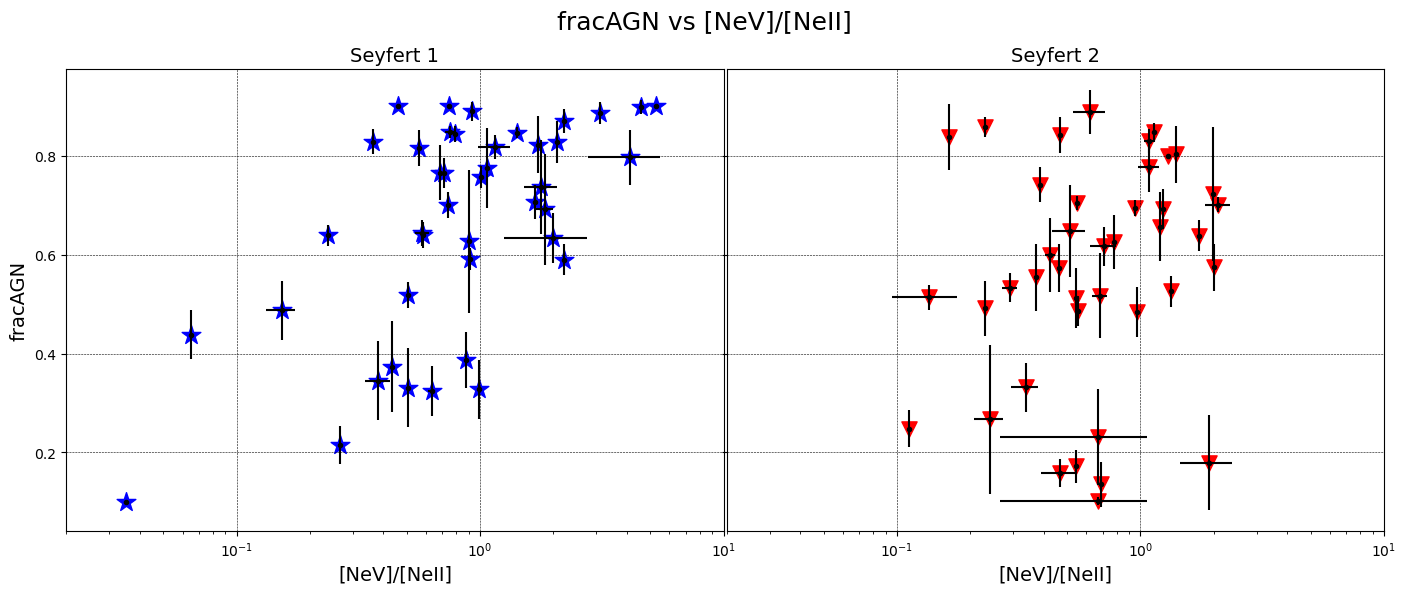

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(17,6),sharey=True)
fig.suptitle(r'fracAGN vs [NeV]/[NeII]', fontsize=18)
ax1.scatter(Ne_Sy1['[NeV]/[NeII]'],Ne_Sy1['bayes.agn.fracAGN'],200,color='blue',marker = '*')
ax1.errorbar(Ne_Sy1['[NeV]/[NeII]'], Ne_Sy1['bayes.agn.fracAGN'],\
             Ne_Sy1['bayes.agn.fracAGN_err'], Ne_Sy1['[NeV]/[NeII]_err'], fmt='k.')
ax1.set_xlim(20e-3,10e0) #ax1.set_xlim(20e-4,10e0)
ax1.set_xscale("log")
ax1.set_xlabel(r'[NeV]/[NeII]', fontsize=14)
#ax1.set_yscale("log")
ax1.set_ylabel(r'fracAGN', fontsize=14)
ax1.set_title('Seyfert 1', fontsize=14)
ax2.scatter(Ne_Sy2['[NeV]/[NeII]'], Ne_Sy2['bayes.agn.fracAGN'],120, color='red', marker = 'v')
ax2.errorbar(Ne_Sy2['[NeV]/[NeII]'], Ne_Sy2['bayes.agn.fracAGN'],\
             Ne_Sy2['bayes.agn.fracAGN_err'], Ne_Sy2['[NeV]/[NeII]_err'], fmt='k.')
ax2.set_xlim(20e-3,10e0)#ax2.set_xlim(20e-4,10e0)
ax2.set_xscale("log")
ax2.set_xlabel(r'[NeV]/[NeII]', fontsize=14)
#ax2.set_yscale("log")
ax2.set_title('Seyfert 2', fontsize=14)
ax1.grid(color='k', linestyle='--', linewidth=0.4)
ax2.grid(color='k', linestyle='--', linewidth=0.4)
plt.subplots_adjust(wspace=0.005) #Space between subplots
plt.savefig(path_graphs+'NeV_NeII_vs_fracAGN_Sy1_vs_Sy2.jpg')

### [NeV]/[NeIII]

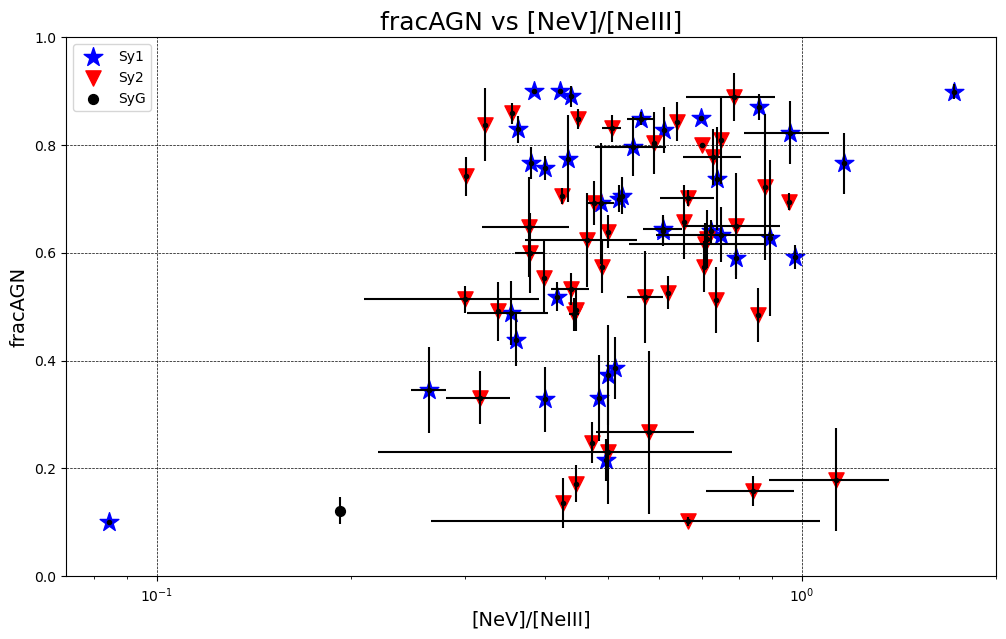

In [12]:
plt.figure(figsize=(12,7))
plt.scatter(Ne_Sy1['[NeV]/[NeIII]'],Ne_Sy1['bayes.agn.fracAGN'],200,color='blue',marker = '*',label='Sy1')
plt.errorbar(Ne_Sy1['[NeV]/[NeIII]'], Ne_Sy1['bayes.agn.fracAGN'],\
             Ne_Sy1['bayes.agn.fracAGN_err'], Ne_Sy1['[NeV]/[NeIII]_err'], fmt='k.')
plt.scatter(Ne_Sy2['[NeV]/[NeIII]'], Ne_Sy2['bayes.agn.fracAGN'],120, color='red', marker = 'v', label='Sy2')
plt.errorbar(Ne_Sy2['[NeV]/[NeIII]'], Ne_Sy2['bayes.agn.fracAGN'],\
             Ne_Sy2['bayes.agn.fracAGN_err'], Ne_Sy2['[NeV]/[NeIII]_err'], fmt='k.')
plt.scatter(Ne_SyG['[NeV]/[NeIII]'], Ne_SyG['bayes.agn.fracAGN'],200, color='black', marker = '.', label='SyG')
plt.errorbar(Ne_SyG['[NeV]/[NeIII]'], Ne_SyG['bayes.agn.fracAGN'],\
             Ne_SyG['bayes.agn.fracAGN_err'], Ne_SyG['[NeV]/[NeIII]_err'], fmt='k.')
plt.xlabel(r'[NeV]/[NeIII]', fontsize=14)
plt.xscale('log')
plt.ylabel(r'fracAGN', fontsize=14)
plt.ylim(0.0,1.0)
plt.grid(color='k', linestyle='--', linewidth=0.5)
plt.title(r'fracAGN vs [NeV]/[NeIII]', fontsize=18)
plt.legend()
plt.savefig(path_graphs+'NeV_NeIII_vs_fracAGN_Sy.jpg')

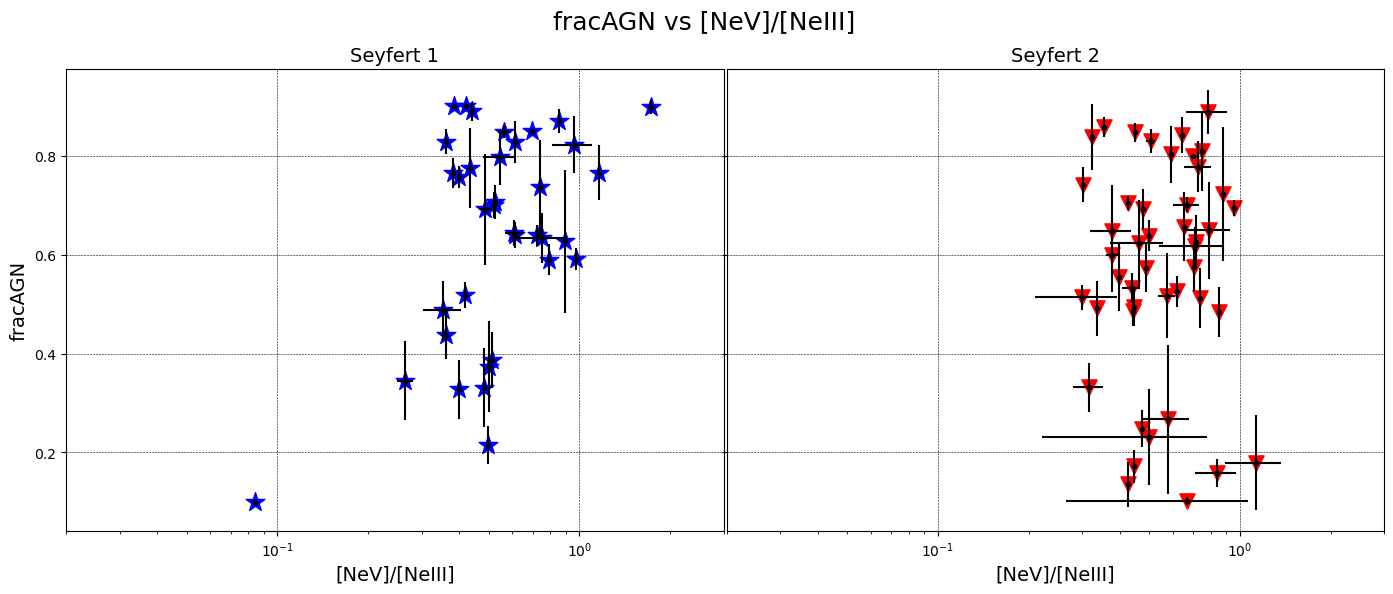

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(17,6),sharey=True)
fig.suptitle(r'fracAGN vs [NeV]/[NeIII]', fontsize=18)
ax1.scatter(Ne_Sy1['[NeV]/[NeIII]'],Ne_Sy1['bayes.agn.fracAGN'],200,color='blue',marker = '*')
ax1.errorbar(Ne_Sy1['[NeV]/[NeIII]'], Ne_Sy1['bayes.agn.fracAGN'],\
             Ne_Sy1['bayes.agn.fracAGN_err'], Ne_Sy1['[NeV]/[NeIII]_err'], fmt='k.')
ax1.set_xlim(20e-3,3e0)
ax1.set_xscale("log")
ax1.set_xlabel(r'[NeV]/[NeIII]', fontsize=14)
#ax1.set_yscale("log")
ax1.set_ylabel(r'fracAGN', fontsize=14)
ax1.set_title('Seyfert 1', fontsize=14)
ax2.scatter(Ne_Sy2['[NeV]/[NeIII]'], Ne_Sy2['bayes.agn.fracAGN'],120, color='red', marker = 'v')
ax2.errorbar(Ne_Sy2['[NeV]/[NeIII]'], Ne_Sy2['bayes.agn.fracAGN'],\
             Ne_Sy2['bayes.agn.fracAGN_err'], Ne_Sy2['[NeV]/[NeIII]_err'], fmt='k.')
ax2.set_xlim(20e-3,3e0)
ax2.set_xscale("log")
ax2.set_xlabel(r'[NeV]/[NeIII]', fontsize=14)
#ax2.set_yscale("log")
ax2.set_title('Seyfert 2', fontsize=14)
ax1.grid(color='k', linestyle='--', linewidth=0.4)
ax2.grid(color='k', linestyle='--', linewidth=0.4)
plt.subplots_adjust(wspace=0.005) #Space between subplots
plt.savefig(path_graphs+'NeV_NeIII_vs_fracAGN_Sy1_vs_Sy2.jpg')

### [NeIII]/[NeII]

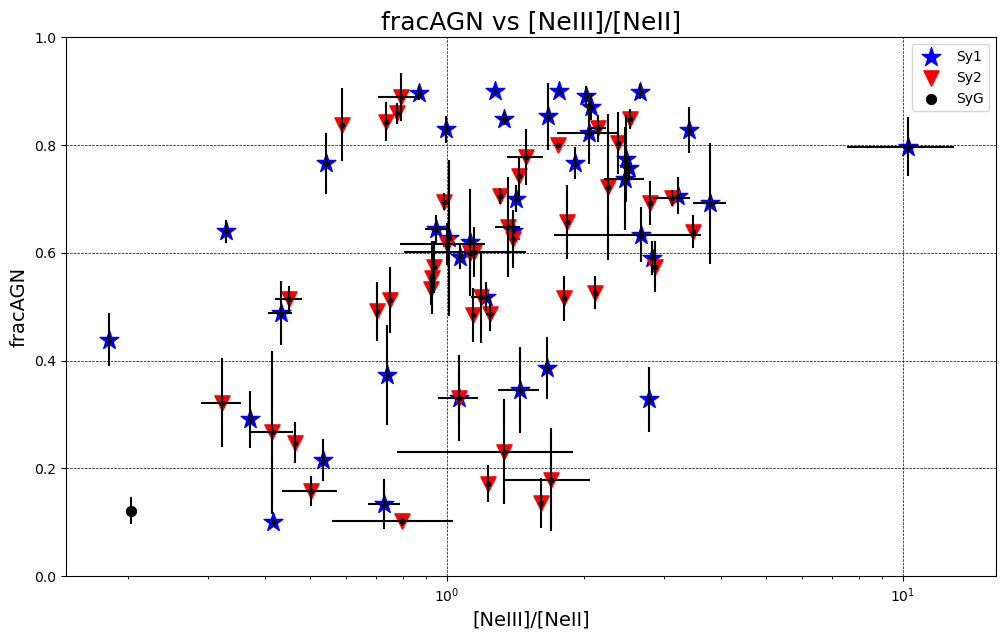

In [14]:
plt.figure(figsize=(12,7))
plt.scatter(Ne_Sy1['[NeIII]/[NeII]'],Ne_Sy1['bayes.agn.fracAGN'],200,color='blue',marker = '*',label='Sy1')
plt.errorbar(Ne_Sy1['[NeIII]/[NeII]'], Ne_Sy1['bayes.agn.fracAGN'],\
             Ne_Sy1['bayes.agn.fracAGN_err'], Ne_Sy1['[NeIII]/[NeII]_err'], fmt='k.')
plt.scatter(Ne_Sy2['[NeIII]/[NeII]'], Ne_Sy2['bayes.agn.fracAGN'],120, color='red', marker = 'v', label='Sy2')
plt.errorbar(Ne_Sy2['[NeIII]/[NeII]'], Ne_Sy2['bayes.agn.fracAGN'],\
             Ne_Sy2['bayes.agn.fracAGN_err'], Ne_Sy2['[NeIII]/[NeII]_err'], fmt='k.')
plt.scatter(Ne_SyG['[NeIII]/[NeII]'], Ne_SyG['bayes.agn.fracAGN'],200, color='black', marker = '.', label='SyG')
plt.errorbar(Ne_SyG['[NeIII]/[NeII]'], Ne_SyG['bayes.agn.fracAGN'],\
             Ne_SyG['bayes.agn.fracAGN_err'], Ne_SyG['[NeIII]/[NeII]_err'], fmt='k.')
plt.xlabel(r'[NeIII]/[NeII]', fontsize=14)
plt.xscale('log')
plt.ylabel(r'fracAGN', fontsize=14)
plt.ylim(0.0,1.0)
plt.grid(color='k', linestyle='--', linewidth=0.5)
plt.title(r'fracAGN vs [NeIII]/[NeII]', fontsize=18)
plt.legend()
plt.savefig(path_graphs+'NeIII_NeII_vs_fracAGN_Sy.jpg')

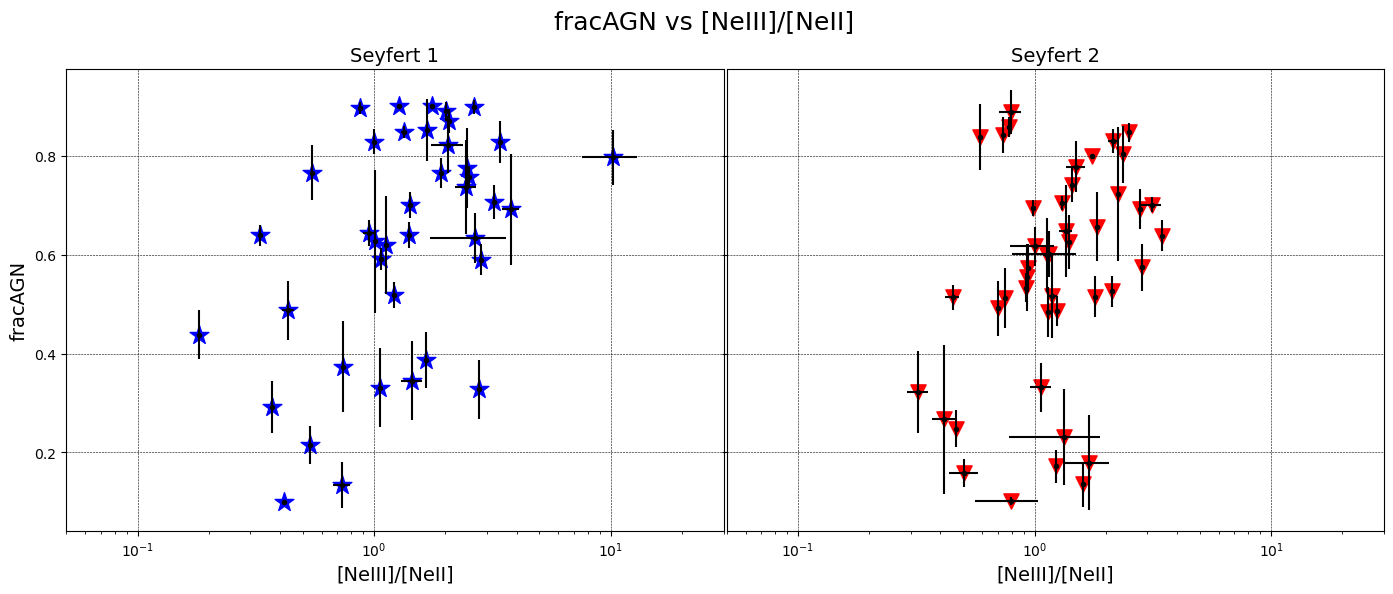

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(17,6),sharey=True)
fig.suptitle(r'fracAGN vs [NeIII]/[NeII]', fontsize=18)
ax1.scatter(Ne_Sy1['[NeIII]/[NeII]'],Ne_Sy1['bayes.agn.fracAGN'],200,color='blue',marker = '*')
ax1.errorbar(Ne_Sy1['[NeIII]/[NeII]'], Ne_Sy1['bayes.agn.fracAGN'],\
             Ne_Sy1['bayes.agn.fracAGN_err'], Ne_Sy1['[NeIII]/[NeII]_err'], fmt='k.')
ax1.set_xlim(50e-3,3e1)
ax1.set_xscale("log")
ax1.set_xlabel(r'[NeIII]/[NeII]', fontsize=14)
#ax1.set_yscale("log")
ax1.set_ylabel(r'fracAGN', fontsize=14)
ax1.set_title('Seyfert 1', fontsize=14)
ax2.scatter(Ne_Sy2['[NeIII]/[NeII]'], Ne_Sy2['bayes.agn.fracAGN'],120, color='red', marker = 'v')
ax2.errorbar(Ne_Sy2['[NeIII]/[NeII]'], Ne_Sy2['bayes.agn.fracAGN'],\
             Ne_Sy2['bayes.agn.fracAGN_err'], Ne_Sy2['[NeIII]/[NeII]_err'], fmt='k.')
ax2.set_xlim(50e-3,3e1)
ax2.set_xscale("log")
ax2.set_xlabel(r'[NeIII]/[NeII]', fontsize=14)
#ax2.set_yscale("log")
ax2.set_title('Seyfert 2', fontsize=14)
ax1.grid(color='k', linestyle='--', linewidth=0.4)
ax2.grid(color='k', linestyle='--', linewidth=0.4)
plt.subplots_adjust(wspace=0.005) #Space between subplots
plt.savefig(path_graphs+'NeIII_NeII_vs_fracAGN_Sy1_vs_Sy2.jpg')

## Graphics of Ne Line Ratios Histograms and Ne Line Ratios vs fracAGN but now by bibcode in each galaxy

### [NeV]/[NeII]

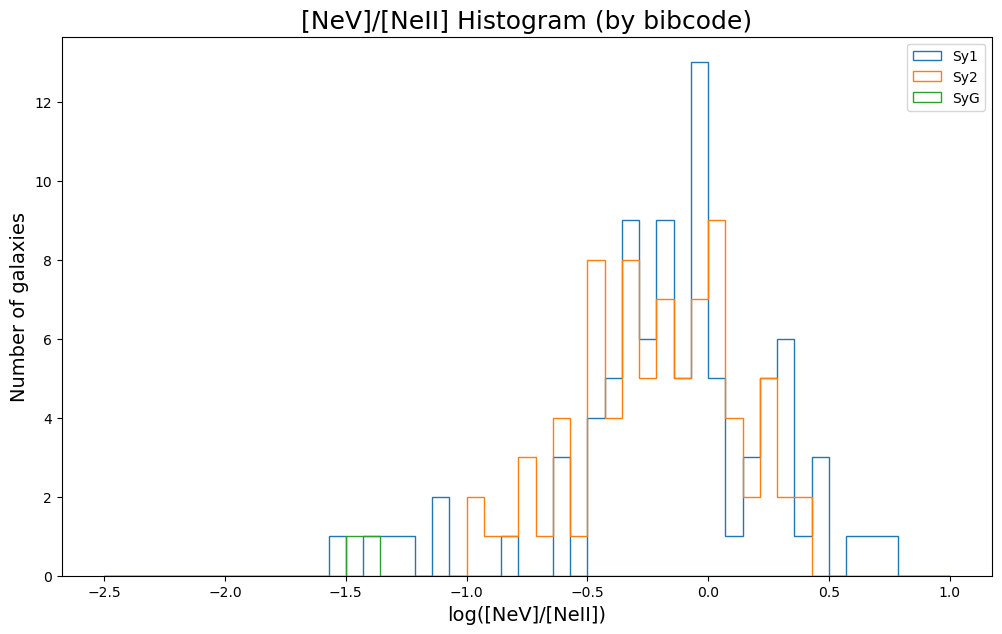

In [16]:
x_NeV_NeII_Sy1_bib = np.log10(Ne_Sy1_bib['[NeV]/[NeII]'])
x_NeV_NeII_Sy2_bib = np.log10(Ne_Sy2_bib['[NeV]/[NeII]'])
x_NeV_NeII_SyG_bib = np.log10(Ne_SyG_bib['[NeV]/[NeII]'])
bins_NeV_NeII_Sy1_bib = np.linspace(-2.5,1,50)
bins_NeV_NeII_Sy2_bib = np.linspace(-2.5,1,50)
bins_NeV_NeII_SyG_bib = np.linspace(-2.5,1,50)
plt.figure(figsize=(12,7))
plt.hist(x_NeV_NeII_Sy1_bib, bins=bins_NeV_NeII_Sy1_bib, histtype='step', label='Sy1')
plt.hist(x_NeV_NeII_Sy2_bib, bins=bins_NeV_NeII_Sy2_bib, histtype='step', label='Sy2')
plt.hist(x_NeV_NeII_SyG_bib, bins=bins_NeV_NeII_SyG_bib, histtype='step', label='SyG')
plt.xlabel('log([NeV]/[NeII])',fontsize=14)
plt.ylabel('Number of galaxies',fontsize=14)
plt.title('[NeV]/[NeII] Histogram (by bibcode)', fontsize=18)
plt.legend()
plt.savefig(path_graphs+'hist_NeV_NeII_Sy_bib.jpg')

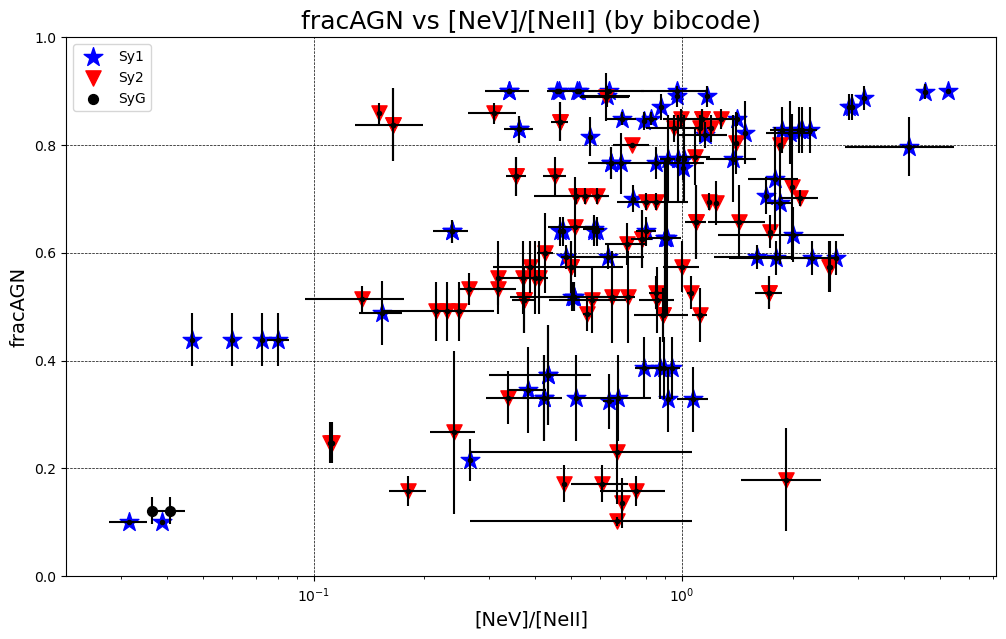

In [17]:
plt.figure(figsize=(12,7))
plt.scatter(Ne_Sy1_bib['[NeV]/[NeII]'],Ne_Sy1_bib['bayes.agn.fracAGN'],200,color='blue',marker = '*',label='Sy1')
plt.errorbar(Ne_Sy1_bib['[NeV]/[NeII]'], Ne_Sy1_bib['bayes.agn.fracAGN'],\
             Ne_Sy1_bib['bayes.agn.fracAGN_err'], Ne_Sy1_bib['[NeV]/[NeII]_err'], fmt='k.')
plt.scatter(Ne_Sy2_bib['[NeV]/[NeII]'], Ne_Sy2_bib['bayes.agn.fracAGN'],120, color='red', marker = 'v', label='Sy2')
plt.errorbar(Ne_Sy2_bib['[NeV]/[NeII]'], Ne_Sy2_bib['bayes.agn.fracAGN'],\
             Ne_Sy2_bib['bayes.agn.fracAGN_err'], Ne_Sy2_bib['[NeV]/[NeII]_err'], fmt='k.')
plt.scatter(Ne_SyG_bib['[NeV]/[NeII]'], Ne_SyG_bib['bayes.agn.fracAGN'],200, color='black', marker = '.', label='SyG')
plt.errorbar(Ne_SyG_bib['[NeV]/[NeII]'], Ne_SyG_bib['bayes.agn.fracAGN'],\
             Ne_SyG_bib['bayes.agn.fracAGN_err'], Ne_SyG_bib['[NeV]/[NeII]_err'], fmt='k.')
plt.xlabel(r'[NeV]/[NeII]', fontsize=14)
plt.xscale('log')
plt.ylabel(r'fracAGN', fontsize=14)
plt.ylim(0.0,1.0)
plt.grid(color='k', linestyle='--', linewidth=0.5)
plt.title(r'fracAGN vs [NeV]/[NeII] (by bibcode)', fontsize=18)
plt.legend()
plt.savefig(path_graphs+'NeV_NeII_vs_fracAGN_Sy_bib.jpg')

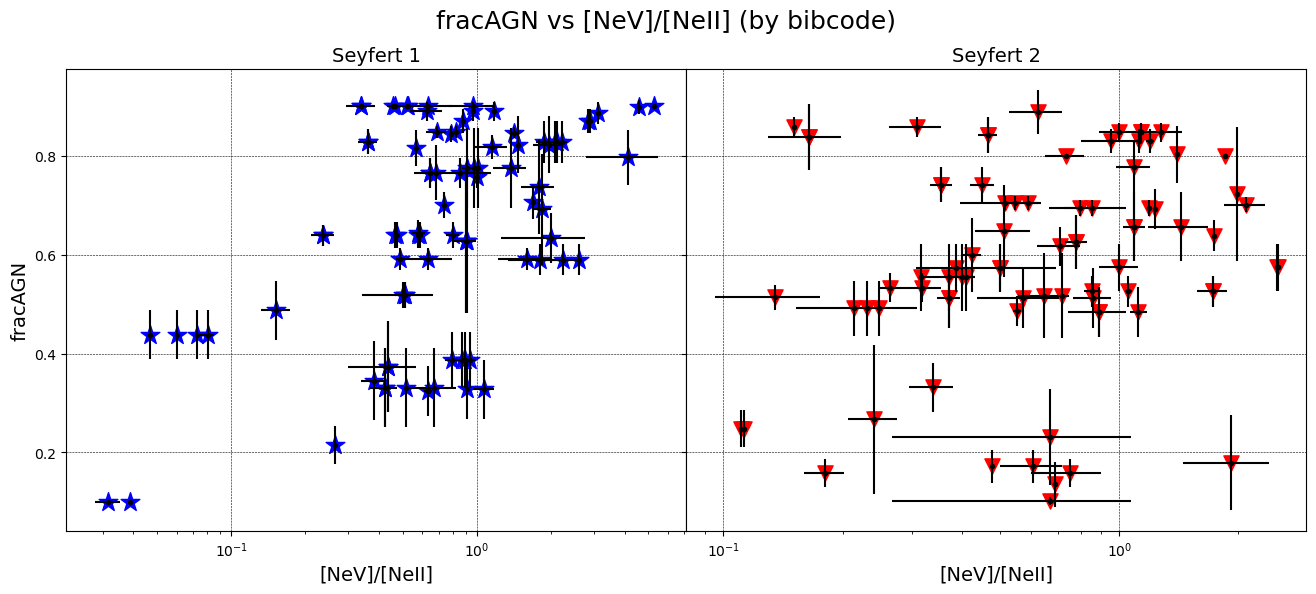

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,6),sharey=True)
fig.suptitle(r'fracAGN vs [NeV]/[NeII] (by bibcode)', fontsize=18)
ax1.scatter(Ne_Sy1_bib['[NeV]/[NeII]'],Ne_Sy1_bib['bayes.agn.fracAGN'],200,color='blue',marker = '*')
ax1.errorbar(Ne_Sy1_bib['[NeV]/[NeII]'], Ne_Sy1_bib['bayes.agn.fracAGN'],\
             Ne_Sy1_bib['bayes.agn.fracAGN_err'], Ne_Sy1_bib['[NeV]/[NeII]_err'], fmt='k.')
ax1.set_xscale("log")
ax1.set_xlabel(r'[NeV]/[NeII]', fontsize=14)
ax1.set_ylabel(r'fracAGN', fontsize=14)
ax1.set_title('Seyfert 1', fontsize=14)
ax2.scatter(Ne_Sy2_bib['[NeV]/[NeII]'], Ne_Sy2_bib['bayes.agn.fracAGN'],120, color='red', marker = 'v')
ax2.errorbar(Ne_Sy2_bib['[NeV]/[NeII]'], Ne_Sy2_bib['bayes.agn.fracAGN'],\
             Ne_Sy2_bib['bayes.agn.fracAGN_err'], Ne_Sy2_bib['[NeV]/[NeII]_err'], fmt='k.')
ax2.set_xscale("log")
ax2.set_xlabel(r'[NeV]/[NeII]', fontsize=14)
ax2.set_title('Seyfert 2', fontsize=14)
ax1.grid(color='k', linestyle='--', linewidth=0.4)
ax2.grid(color='k', linestyle='--', linewidth=0.4)
plt.subplots_adjust(wspace=0) #Space between subplots
plt.savefig(path_graphs+'NeV_NeII_vs_fracAGN_Sy1_vs_Sy2_bib.jpg')

## Correlations

In [19]:
#Seyfert 1
log_NeVNeII_Sy1 = np.log10(Ne_Sy1['[NeV]/[NeII]'])
log_NeVNeIII_Sy1 = np.log10(Ne_Sy1['[NeV]/[NeIII]'])
log_NeIIINeII_Sy1 = np.log10(Ne_Sy1['[NeIII]/[NeII]'])
log_NeIINeV_Sy1 = np.log10(Ne_Sy1['[NeII]/[NeV]'])
log_fracAGN_Sy1 = np.log10(Ne_Sy1['bayes.agn.fracAGN'])
log_sfr_Sy1 = np.log10(Ne_Sy1['bayes.sfh.sfr'])
log_sm_Sy1 = np.log10(Ne_Sy1['bayes.stellar.m_star'])

Ne_Sy1['log_[NeV]/[NeII]'] = log_NeVNeII_Sy1
Ne_Sy1['log_[NeV]/[NeIII]'] = log_NeVNeIII_Sy1
Ne_Sy1['log_[NeIII]/[NeII]'] = log_NeIIINeII_Sy1
Ne_Sy1['log_[NeII]/[NeV]'] = log_NeIINeV_Sy1
Ne_Sy1['log_bayes.agn.fracAGN'] = log_fracAGN_Sy1
Ne_Sy1['log_bayes.sfh.sfr'] = log_sfr_Sy1
Ne_Sy1['log_bayes.stellar.m_star'] = log_sm_Sy1

#Seyfert 2
log_NeVNeII_Sy2 = np.log10(Ne_Sy2['[NeV]/[NeII]'])
log_NeVNeIII_Sy2 = np.log10(Ne_Sy2['[NeV]/[NeIII]'])
log_NeIIINeII_Sy2 = np.log10(Ne_Sy2['[NeIII]/[NeII]'])
log_NeIINeV_Sy2 = np.log10(Ne_Sy2['[NeII]/[NeV]'])
log_fracAGN_Sy2 = np.log10(Ne_Sy2['bayes.agn.fracAGN'])
log_sfr_Sy2 = np.log10(Ne_Sy2['bayes.sfh.sfr'])
log_sm_Sy2 = np.log10(Ne_Sy2['bayes.stellar.m_star'])

Ne_Sy2['log_[NeV]/[NeII]'] = log_NeVNeII_Sy2
Ne_Sy2['log_[NeV]/[NeIII]'] = log_NeVNeIII_Sy2
Ne_Sy2['log_[NeIII]/[NeII]'] = log_NeIIINeII_Sy2
Ne_Sy2['log_[NeII]/[NeV]'] = log_NeIINeV_Sy2
Ne_Sy2['log_bayes.agn.fracAGN'] = log_fracAGN_Sy2
Ne_Sy2['log_bayes.sfh.sfr'] = log_sfr_Sy2
Ne_Sy2['log_bayes.stellar.m_star'] = log_sm_Sy2

df_Ne_Sy1 = Ne_Sy1.to_pandas()
df_Ne_Sy2 = Ne_Sy2.to_pandas()

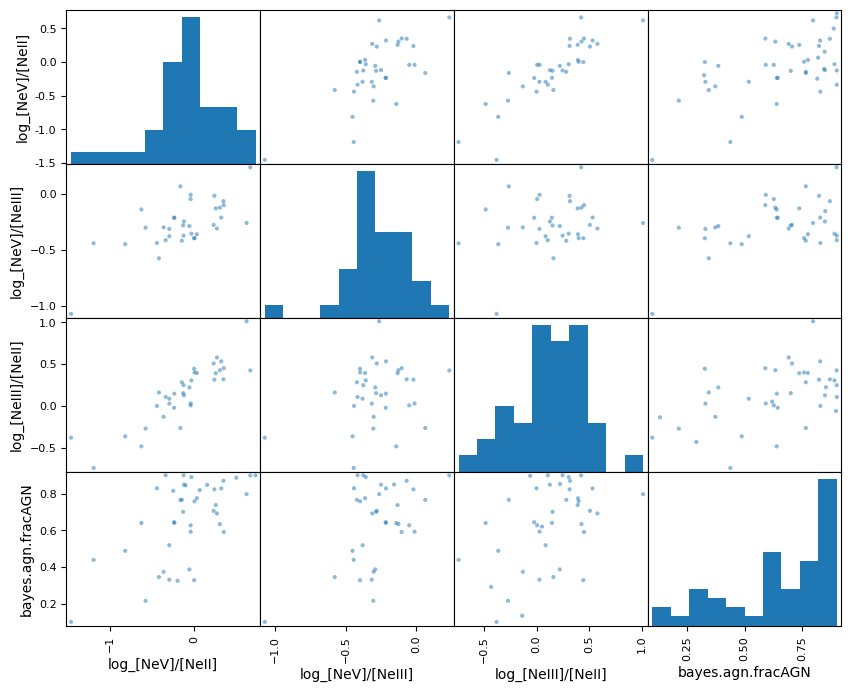

In [20]:
attributes=['log_[NeV]/[NeII]', 'log_[NeV]/[NeIII]', 'log_[NeIII]/[NeII]', 'bayes.agn.fracAGN']
scatMatrix_Sy1=pd.plotting.scatter_matrix(df_Ne_Sy1[attributes], figsize=(10,8))

In [21]:
#scatMatrix_Sy2=pd.plotting.scatter_matrix(df_Ne_Sy2[attributes], figsize=(10,8))

In [22]:
NeVNeII_corr_Sy1 = df_Ne_Sy1.corr()['log_[NeV]/[NeII]']
NeVNeII_corr_Sy1

RA                         -0.070530
DEC                         0.119451
redshift                    0.364366
[NeV]/[NeII]                0.820787
[NeV]/[NeII]_err            0.744571
[NeV]/[NeIII]               0.565624
[NeV]/[NeIII]_err           0.446360
[NeIII]/[NeII]              0.660443
[NeIII]/[NeII]_err          0.663155
[NeII]/[NeV]               -0.770487
[NeII]/[NeV]_err           -0.729183
bayes.agn.fracAGN           0.613751
bayes.agn.fracAGN_err       0.033873
bayes.agn.i                -0.085690
bayes.agn.i_err            -0.175607
bayes.sfh.sfr               0.122260
bayes.sfh.sfr_err           0.174233
bayes.stellar.m_star        0.192044
bayes.stellar.m_star_err    0.271143
best.reduced_chi_square    -0.049958
log.reduced_chi_square     -0.031263
log_[NeV]/[NeII]            1.000000
log_[NeV]/[NeIII]           0.684217
log_[NeIII]/[NeII]          0.871863
log_[NeII]/[NeV]           -0.998196
log_bayes.agn.fracAGN       0.645123
log_bayes.sfh.sfr           0.054311
l

In [23]:
NeVNeII_corr_Sy2 = df_Ne_Sy2.corr()['log_[NeV]/[NeII]']
NeVNeII_corr_Sy2

RA                          0.106751
DEC                        -0.259935
redshift                    0.017468
[NeV]/[NeII]                0.927820
[NeV]/[NeII]_err            0.562967
[NeV]/[NeIII]               0.597861
[NeV]/[NeIII]_err           0.205255
[NeIII]/[NeII]              0.814528
[NeIII]/[NeII]_err          0.533667
[NeII]/[NeV]               -0.911925
[NeII]/[NeV]_err           -0.611437
bayes.agn.fracAGN           0.195704
bayes.agn.fracAGN_err      -0.014829
bayes.agn.i                 0.099448
bayes.agn.i_err            -0.419454
bayes.sfh.sfr               0.130084
bayes.sfh.sfr_err           0.069434
bayes.stellar.m_star       -0.040492
bayes.stellar.m_star_err   -0.003268
best.reduced_chi_square    -0.148980
log.reduced_chi_square     -0.170737
log_[NeV]/[NeII]            1.000000
log_[NeV]/[NeIII]           0.635600
log_[NeIII]/[NeII]          0.861109
log_[NeII]/[NeV]           -0.993491
log_bayes.agn.fracAGN       0.156868
log_bayes.sfh.sfr          -0.046749
l

In [24]:
NeVNeIII_corr_Sy1 = df_Ne_Sy1.corr()['log_[NeV]/[NeIII]']
NeVNeIII_corr_Sy1

RA                         -0.163596
DEC                         0.113377
redshift                    0.228362
[NeV]/[NeII]                0.538687
[NeV]/[NeII]_err            0.366036
[NeV]/[NeIII]               0.900039
[NeV]/[NeIII]_err           0.750627
[NeIII]/[NeII]              0.139553
[NeIII]/[NeII]_err          0.139382
[NeII]/[NeV]               -0.681953
[NeII]/[NeV]_err           -0.566124
bayes.agn.fracAGN           0.499270
bayes.agn.fracAGN_err       0.127480
bayes.agn.i                -0.032392
bayes.agn.i_err            -0.193134
bayes.sfh.sfr               0.109263
bayes.sfh.sfr_err           0.026698
bayes.stellar.m_star        0.274454
bayes.stellar.m_star_err    0.169219
best.reduced_chi_square    -0.042124
log.reduced_chi_square     -0.020392
log_[NeV]/[NeII]            0.684217
log_[NeV]/[NeIII]           1.000000
log_[NeIII]/[NeII]          0.251784
log_[NeII]/[NeV]           -0.675059
log_bayes.agn.fracAGN       0.605692
log_bayes.sfh.sfr           0.095931
l

In [25]:
NeVNeIII_corr_Sy2 = df_Ne_Sy2.corr()['log_[NeV]/[NeIII]']
NeVNeIII_corr_Sy2

RA                          0.094719
DEC                         0.100831
redshift                    0.245623
[NeV]/[NeII]                0.587093
[NeV]/[NeII]_err            0.515606
[NeV]/[NeIII]               0.983904
[NeV]/[NeIII]_err           0.467088
[NeIII]/[NeII]              0.177892
[NeIII]/[NeII]_err          0.369868
[NeII]/[NeV]               -0.529315
[NeII]/[NeV]_err           -0.395308
bayes.agn.fracAGN          -0.017425
bayes.agn.fracAGN_err       0.158331
bayes.agn.i                -0.135669
bayes.agn.i_err            -0.143386
bayes.sfh.sfr               0.312756
bayes.sfh.sfr_err           0.250131
bayes.stellar.m_star        0.179790
bayes.stellar.m_star_err    0.180225
best.reduced_chi_square    -0.223440
log.reduced_chi_square     -0.230234
log_[NeV]/[NeII]            0.635600
log_[NeV]/[NeIII]           1.000000
log_[NeIII]/[NeII]          0.192083
log_[NeII]/[NeV]           -0.604779
log_bayes.agn.fracAGN      -0.062051
log_bayes.sfh.sfr           0.218314
l

In [26]:
NeIIINeII_corr_Sy1 = df_Ne_Sy1.corr()['log_[NeIII]/[NeII]']
NeIIINeII_corr_Sy1

RA                         -0.044040
DEC                         0.034355
redshift                    0.379623
[NeV]/[NeII]                0.737916
[NeV]/[NeII]_err            0.805101
[NeV]/[NeIII]               0.157244
[NeV]/[NeIII]_err           0.212058
[NeIII]/[NeII]              0.821292
[NeIII]/[NeII]_err          0.800223
[NeII]/[NeV]               -0.601014
[NeII]/[NeV]_err           -0.686109
bayes.agn.fracAGN           0.488199
bayes.agn.fracAGN_err       0.083527
bayes.agn.i                 0.066948
bayes.agn.i_err            -0.114560
bayes.sfh.sfr               0.084813
bayes.sfh.sfr_err           0.235658
bayes.stellar.m_star        0.104431
bayes.stellar.m_star_err    0.236780
best.reduced_chi_square     0.033028
log.reduced_chi_square      0.037778
log_[NeV]/[NeII]            0.871863
log_[NeV]/[NeIII]           0.251784
log_[NeIII]/[NeII]          1.000000
log_[NeII]/[NeV]           -0.876124
log_bayes.agn.fracAGN       0.477446
log_bayes.sfh.sfr           0.024035
l

In [27]:
NeIIINeII_corr_Sy2 = df_Ne_Sy2.corr()['log_[NeIII]/[NeII]']
NeIIINeII_corr_Sy2

RA                         -0.029173
DEC                        -0.312269
redshift                   -0.273519
[NeV]/[NeII]                0.832923
[NeV]/[NeII]_err            0.314366
[NeV]/[NeIII]               0.151190
[NeV]/[NeIII]_err          -0.153403
[NeIII]/[NeII]              0.949647
[NeIII]/[NeII]_err          0.450447
[NeII]/[NeV]               -0.773498
[NeII]/[NeV]_err           -0.569609
bayes.agn.fracAGN           0.338174
bayes.agn.fracAGN_err      -0.152997
bayes.agn.i                 0.251098
bayes.agn.i_err            -0.528837
bayes.sfh.sfr              -0.151371
bayes.sfh.sfr_err          -0.142806
bayes.stellar.m_star       -0.274741
bayes.stellar.m_star_err   -0.180205
best.reduced_chi_square    -0.030451
log.reduced_chi_square     -0.054408
log_[NeV]/[NeII]            0.861109
log_[NeV]/[NeIII]           0.192083
log_[NeIII]/[NeII]          1.000000
log_[NeII]/[NeV]           -0.875680
log_bayes.agn.fracAGN       0.314436
log_bayes.sfh.sfr          -0.239886
l

### By bibcode

In [28]:
#Seyfert 1
log_NeVNeII_Sy1_bib = np.log10(Ne_Sy1_bib['[NeV]/[NeII]'])
log_NeVNeIII_Sy1_bib = np.log10(Ne_Sy1_bib['[NeV]/[NeIII]'])
log_NeIIINeII_Sy1_bib = np.log10(Ne_Sy1_bib['[NeIII]/[NeII]'])
log_fracAGN_Sy1_bib = np.log10(Ne_Sy1_bib['bayes.agn.fracAGN'])
log_sfr_Sy1_bib = np.log10(Ne_Sy1_bib['bayes.sfh.sfr'])
log_sm_Sy1_bib = np.log10(Ne_Sy1_bib['bayes.stellar.m_star'])

Ne_Sy1_bib['log_[NeV]/[NeII]'] = log_NeVNeII_Sy1_bib
Ne_Sy1_bib['log_[NeV]/[NeIII]'] = log_NeVNeIII_Sy1_bib
Ne_Sy1_bib['log_[NeIII]/[NeII]'] = log_NeIIINeII_Sy1_bib
Ne_Sy1_bib['log_bayes.agn.fracAGN'] = log_fracAGN_Sy1_bib
Ne_Sy1_bib['log_bayes.sfh.sfr'] = log_sfr_Sy1_bib
Ne_Sy1_bib['log_bayes.stellar.m_star'] = log_sm_Sy1_bib

#Seyfert 2
log_NeVNeII_Sy2_bib = np.log10(Ne_Sy2_bib['[NeV]/[NeII]'])
log_NeVNeIII_Sy2_bib = np.log10(Ne_Sy2_bib['[NeV]/[NeIII]'])
log_NeIIINeII_Sy2_bib = np.log10(Ne_Sy2_bib['[NeIII]/[NeII]'])
log_fracAGN_Sy2_bib = np.log10(Ne_Sy2_bib['bayes.agn.fracAGN'])
log_sfr_Sy2_bib = np.log10(Ne_Sy2_bib['bayes.sfh.sfr'])
log_sm_Sy2_bib = np.log10(Ne_Sy2_bib['bayes.stellar.m_star'])

Ne_Sy2_bib['log_[NeV]/[NeII]'] = log_NeVNeII_Sy2_bib
Ne_Sy2_bib['log_[NeV]/[NeIII]'] = log_NeVNeIII_Sy2_bib
Ne_Sy2_bib['log_[NeIII]/[NeII]'] = log_NeIIINeII_Sy2_bib
Ne_Sy2_bib['log_bayes.agn.fracAGN'] = log_fracAGN_Sy2_bib
Ne_Sy2_bib['log_bayes.sfh.sfr'] = log_sfr_Sy2_bib
Ne_Sy2_bib['log_bayes.stellar.m_star'] = log_sm_Sy2_bib

df_Ne_Sy1_bib = Ne_Sy1_bib.to_pandas()
df_Ne_Sy2_bib = Ne_Sy2_bib.to_pandas()

In [29]:
NeVNeII_corr_Sy1_bib = df_Ne_Sy1_bib.corr()['log_[NeV]/[NeII]']
NeVNeII_corr_Sy1_bib

RA                         -0.328729
DEC                         0.117097
redshift                    0.319231
[NeV]/[NeII]                0.806788
[NeV]/[NeII]_err            0.579213
[NeV]/[NeIII]               0.475671
[NeV]/[NeIII]_err           0.260213
[NeIII]/[NeII]              0.687973
[NeIII]/[NeII]_err          0.493523
bayes.agn.fracAGN           0.521965
bayes.agn.fracAGN_err       0.091570
bayes.agn.i                -0.050899
bayes.agn.i_err            -0.019319
bayes.sfh.sfr               0.093366
bayes.sfh.sfr_err           0.148985
bayes.stellar.m_star        0.123730
bayes.stellar.m_star_err    0.226136
best.reduced_chi_square    -0.031422
log.reduced_chi_square     -0.028497
log_[NeV]/[NeII]            1.000000
log_[NeV]/[NeIII]           0.635246
log_[NeIII]/[NeII]          0.864645
log_bayes.agn.fracAGN       0.569998
log_bayes.sfh.sfr          -0.003648
log_bayes.stellar.m_star    0.323703
Name: log_[NeV]/[NeII], dtype: float64

In [30]:
NeVNeII_corr_Sy2_bib = df_Ne_Sy2_bib.corr()['log_[NeV]/[NeII]']
NeVNeII_corr_Sy2_bib

RA                          0.198025
DEC                        -0.239523
redshift                   -0.013729
[NeV]/[NeII]                0.917504
[NeV]/[NeII]_err            0.451271
[NeV]/[NeIII]               0.622293
[NeV]/[NeIII]_err           0.047290
[NeIII]/[NeII]              0.813407
[NeIII]/[NeII]_err          0.475849
bayes.agn.fracAGN           0.208425
bayes.agn.fracAGN_err      -0.074753
bayes.agn.i                 0.168170
bayes.agn.i_err            -0.407776
bayes.sfh.sfr               0.103676
bayes.sfh.sfr_err           0.001890
bayes.stellar.m_star        0.037117
bayes.stellar.m_star_err    0.001664
best.reduced_chi_square    -0.013654
log.reduced_chi_square     -0.040690
log_[NeV]/[NeII]            1.000000
log_[NeV]/[NeIII]           0.668223
log_[NeIII]/[NeII]          0.853060
log_bayes.agn.fracAGN       0.192153
log_bayes.sfh.sfr          -0.022007
log_bayes.stellar.m_star    0.053372
Name: log_[NeV]/[NeII], dtype: float64

## Notebook Info

In [31]:
%reload_ext watermark
%watermark -a "Jonhatan Bernal" -d -v -m
print('Specific Python packages')
%watermark -iv -w --packages astropy

Author: Jonhatan Bernal

Python implementation: CPython
Python version       : 3.9.12
IPython version      : 7.31.1

Compiler    : GCC 7.5.0
OS          : Linux
Release     : 5.15.0-56-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit

Specific Python packages
astropy: 5.1

numpy     : 1.21.5
astropy   : 5.1
matplotlib: 3.5.2
pandas    : 1.4.4

Watermark: 2.3.1



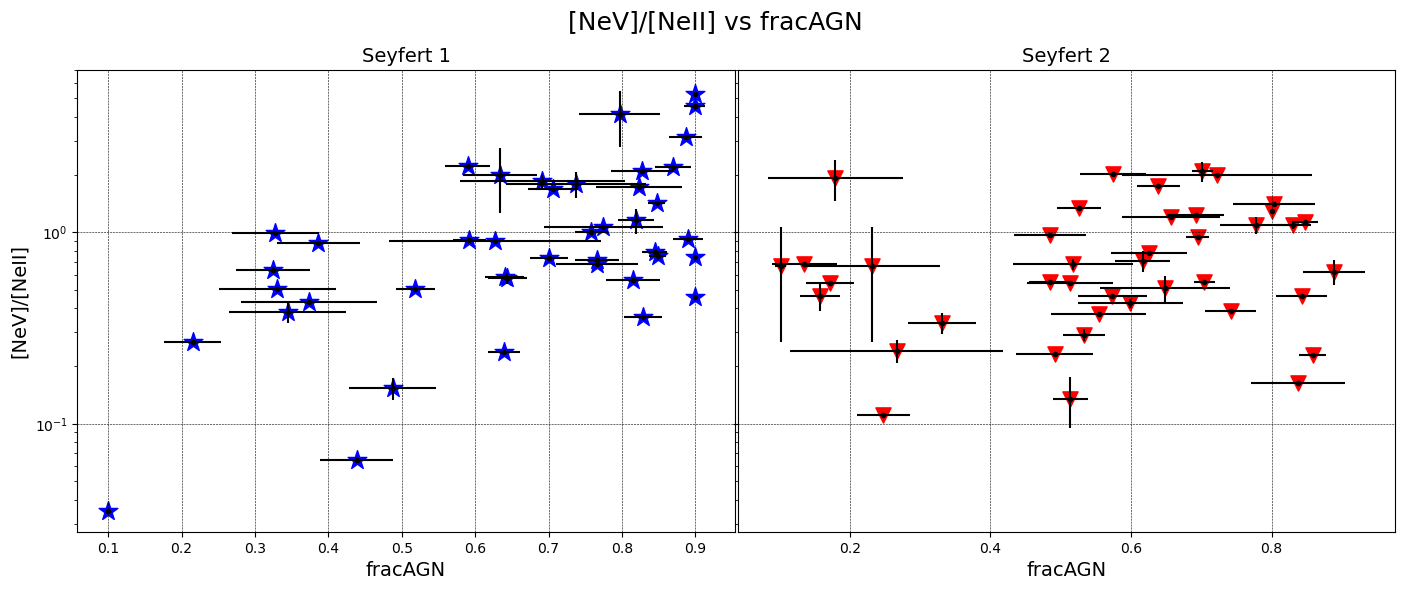

In [32]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(17,6),sharey=True)
fig.suptitle(r'[NeV]/[NeII] vs fracAGN', fontsize=18)
ax1.scatter(Ne_Sy1['bayes.agn.fracAGN'],Ne_Sy1['[NeV]/[NeII]'],200,color='blue',marker = '*')
ax1.errorbar(Ne_Sy1['bayes.agn.fracAGN'], Ne_Sy1['[NeV]/[NeII]'],\
             Ne_Sy1['[NeV]/[NeII]_err'], Ne_Sy1['bayes.agn.fracAGN_err'], fmt='k.')
#ax1.set_xlim(20e-4,10e0)
#ax1.set_xscale("log")
ax1.set_xlabel(r'fracAGN', fontsize=14)
ax1.set_yscale("log")
ax1.set_ylabel(r'[NeV]/[NeII]', fontsize=14)
ax1.set_title('Seyfert 1', fontsize=14)
ax2.scatter(Ne_Sy2['bayes.agn.fracAGN'], Ne_Sy2['[NeV]/[NeII]'], 120, color='red', marker = 'v')
ax2.errorbar(Ne_Sy2['bayes.agn.fracAGN'], Ne_Sy2['[NeV]/[NeII]'], \
             Ne_Sy2['[NeV]/[NeII]_err'], Ne_Sy2['bayes.agn.fracAGN_err'], fmt='k.')
#ax2.set_xlim(20e-4,10e0)
#ax2.set_xscale("log")
ax2.set_xlabel(r'fracAGN', fontsize=14)
ax2.set_yscale("log")
ax2.set_title('Seyfert 2', fontsize=14)
ax1.grid(color='k', linestyle='--', linewidth=0.4)
ax2.grid(color='k', linestyle='--', linewidth=0.4)
plt.subplots_adjust(wspace=0.005) #Space between subplots

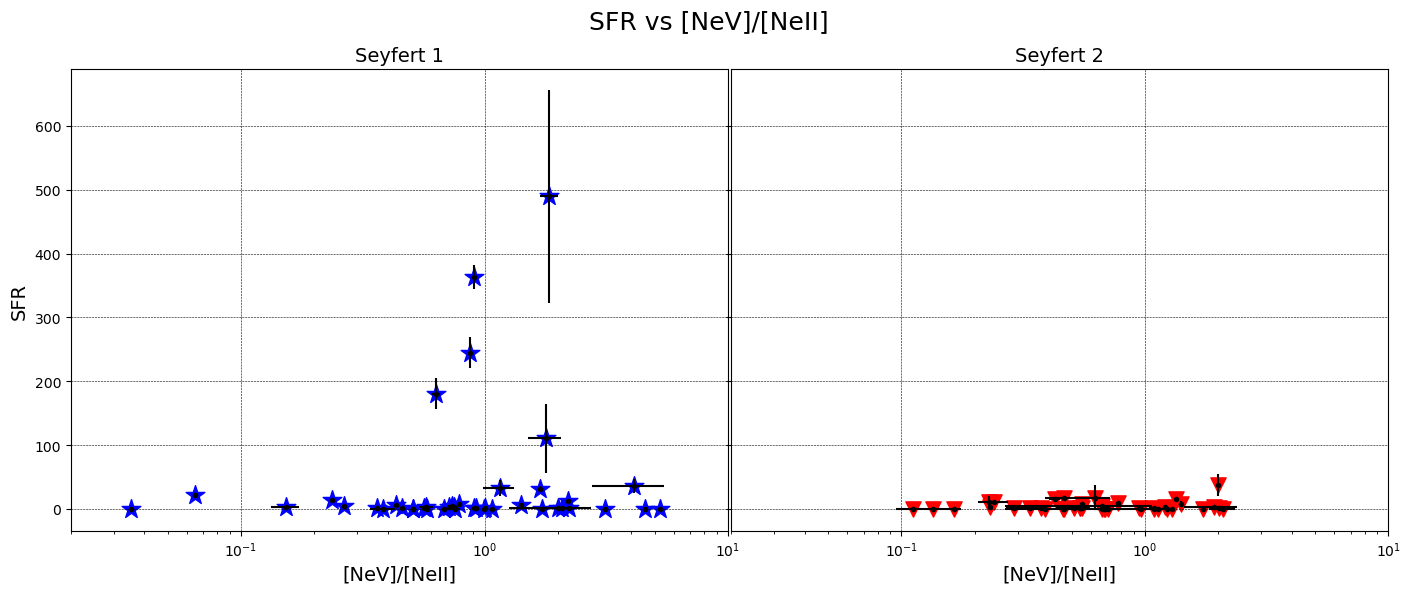

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(17,6),sharey=True)
fig.suptitle(r'SFR vs [NeV]/[NeII]', fontsize=18)
ax1.scatter(Ne_Sy1['[NeV]/[NeII]'],Ne_Sy1['bayes.sfh.sfr'],200,color='blue',marker = '*')
ax1.errorbar(Ne_Sy1['[NeV]/[NeII]'], Ne_Sy1['bayes.sfh.sfr'],\
             Ne_Sy1['bayes.sfh.sfr_err'], Ne_Sy1['[NeV]/[NeII]_err'], fmt='k.')
ax1.set_xlim(20e-3,10e0) #ax1.set_xlim(20e-4,10e0)
ax1.set_xscale("log")
ax1.set_xlabel(r'[NeV]/[NeII]', fontsize=14)
#ax1.set_yscale("log")
ax1.set_ylabel(r'SFR', fontsize=14)
ax1.set_title('Seyfert 1', fontsize=14)
ax2.scatter(Ne_Sy2['[NeV]/[NeII]'], Ne_Sy2['bayes.sfh.sfr'],120, color='red', marker = 'v')
ax2.errorbar(Ne_Sy2['[NeV]/[NeII]'], Ne_Sy2['bayes.sfh.sfr'],\
             Ne_Sy2['bayes.sfh.sfr_err'], Ne_Sy2['[NeV]/[NeII]_err'], fmt='k.')
ax2.set_xlim(20e-3,10e0)#ax2.set_xlim(20e-4,10e0)
ax2.set_xscale("log")
ax2.set_xlabel(r'[NeV]/[NeII]', fontsize=14)
#ax2.set_yscale("log")
ax2.set_title('Seyfert 2', fontsize=14)
ax1.grid(color='k', linestyle='--', linewidth=0.4)
ax2.grid(color='k', linestyle='--', linewidth=0.4)
plt.subplots_adjust(wspace=0.005) #Space between subplots
plt.savefig(path_graphs+'NeV_NeII_vs_sfr_Sy1_vs_Sy2.jpg')

In [34]:
NeVNeII_corr_Sy1 = df_Ne_Sy1.corr()['log_[NeII]/[NeV]']
NeVNeII_corr_Sy1

RA                          0.061025
DEC                        -0.116311
redshift                   -0.366526
[NeV]/[NeII]               -0.822638
[NeV]/[NeII]_err           -0.744947
[NeV]/[NeIII]              -0.556718
[NeV]/[NeIII]_err          -0.443749
[NeIII]/[NeII]             -0.668970
[NeIII]/[NeII]_err         -0.665009
[NeII]/[NeV]                0.770426
[NeII]/[NeV]_err            0.728574
bayes.agn.fracAGN          -0.607222
bayes.agn.fracAGN_err      -0.045756
bayes.agn.i                 0.075991
bayes.agn.i_err             0.167494
bayes.sfh.sfr              -0.108162
bayes.sfh.sfr_err          -0.176772
bayes.stellar.m_star       -0.163224
bayes.stellar.m_star_err   -0.263643
best.reduced_chi_square     0.054528
log.reduced_chi_square      0.037775
log_[NeV]/[NeII]           -0.998196
log_[NeV]/[NeIII]          -0.675059
log_[NeIII]/[NeII]         -0.876124
log_[NeII]/[NeV]            1.000000
log_bayes.agn.fracAGN      -0.639390
log_bayes.sfh.sfr          -0.040763
l